# Computer Simulations of Random Variables and Monte Carlo Studies
## Inverse Transform Method, Rejection Method, Special Methods

In [140]:
import scipy.stats as stats
import numpy as np

## 1

# 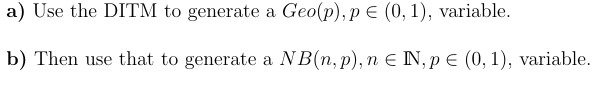

### a)

$$ X \in Geo(p),\ p \in (0, 1) $$
$$ cdf: F(x) = 1 - \left(1 - p\right)^{x+1} $$
$$\text{DITM says: }F(x) \ge U(0, 1)$$

$$ X = min\left(X \ge \frac{ln(U)}{ln\left(1 - p\right)} - 1\right),\ X = \left\lceil \frac{ln(U)}{ln\left(1 - p\right)} - 1 \right\rceil,\ \lceil\ \rceil - \text{ceiling function}$$ 

In [86]:
# Function generates a Random Variable with Geometric distribution using DITM, given a probability p
def generate_geom_rv(p): 
    U = np.random.rand()
    return np.ceil(
        np.log(U) / np.log(1 - p) 
        - 1
    )

In [142]:
generate_geom_rv(0.3)

5.0

### b)

$$ X \sim NB(n, p),\ \text{Number of trials to reach $n$ successes} $$
$$ \text{One success = One Random Variable of Geometric Distribution}$$

In [135]:
p = 0.3 # probability of success
N = 100 # number of successes required in a simulation
M = 1000 # number of simulations

In [139]:
X = np.zeros((M, N))
# print(X.shape)
for j in range(M):
    for i in range(N):
        X[j, i] = generate_geom_rv(p)
    # print(np.sum(X))
np.mean(np.sum(X, 1))

232.404

#### Comparison with software package

In [138]:
np.mean(stats.nbinom.rvs(N, p, size=M))

233.35

## 2

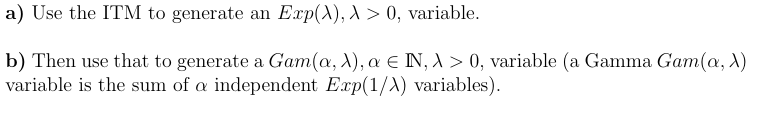

$$ X \in Exp(\lambda),\ \lambda \gt 0 $$
$$ cdf: F(x) = 1 - e^{-\lambda x}$$
$$\text{ITM says: }F(x) = U(0, 1)$$

$$ X = -\frac{1}{\lambda}ln(U)$$ 

### a)

In [141]:
# Function generates a Random Variable with Exponential distribution using ITM, given lambda l
def generate_exp_rv(l): 
    U = np.random.rand()
    return -1 / l * np.log(U)

In [143]:
generate_exp_rv(5)

0.5064516552519326

In [148]:
stats.expon.rvs(1/5)

0.49741991457765705

### b)

In [149]:
l = 0.3 # probability of success
alpha = 100 # number of successes required in a simulation
M = 1000 # number of simulations

In [150]:
X = np.zeros((M, alpha))
# print(X.shape)
for j in range(M):
    for i in range(alpha):
        X[j, i] = generate_exp_rv(l)
    # print(np.sum(X))
np.mean(np.sum(X, 1))

333.4102956376453

#### Comparison with software package

In [151]:
np.mean(stats.gamma.rvs(a=alpha, scale=1/l, size=M))

333.04431196510217

## 3

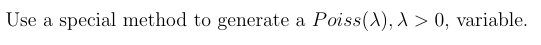

$$ X \sim P(\lambda t),\ \text{$X$ - number of rare events occurring in time t} $$
$$ X = max\left\{x\ |\ U_1 \cdot\ ...\ \cdot U_n \ge e^{-\lambda}\right\}$$

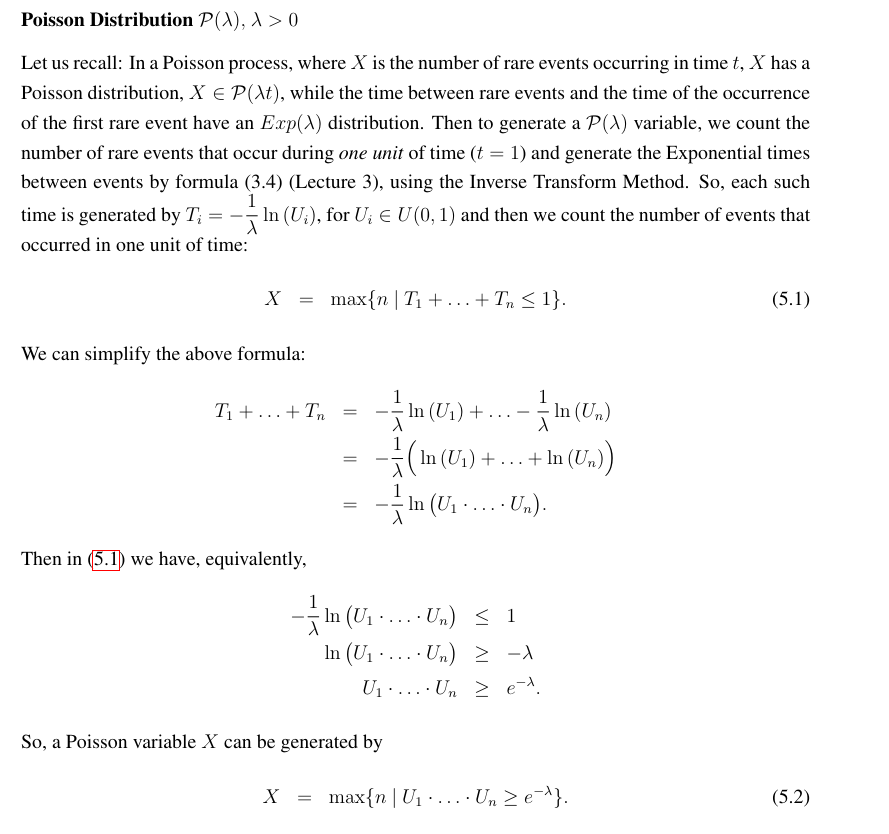

In [394]:
# Function generates a Random Variable with Poisson distribution using a special method, given lambda l = l' * t
def generate_poisson_rv(l):
    prod = np.random.rand()
    n = 0
    while prod >= np.e ** -l:
        n = n + 1
        prod = prod * np.random.rand()
        if prod < np.e ** -l:
            break
    return n

In [395]:
l = 5 # chance for a rare event to happen
t = 5 # number of time units we want to count for rare events
M = 10000 # number of simulations

In [396]:
generate_poisson_rv(l*t)

26

In [397]:
X = np.zeros((M, 1))
# print(X.shape)
for j in range(M):
    X[j, 0] = generate_poisson_rv(l*t)
np.mean(np.sum(X, 1))

25.0673

In [400]:
np.mean(stats.poisson.rvs(mu=l*t, size=M))

25.0384

## 4

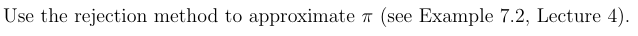

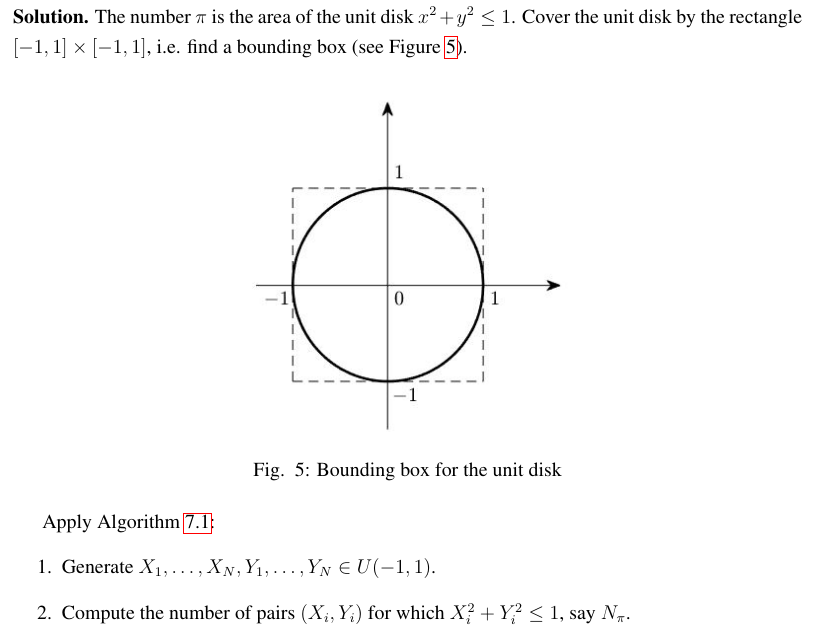 </br>
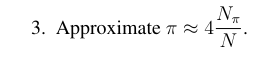

In [275]:
N = 123456789

In [276]:
X = np.random.uniform(-1, 1, N)
Y = np.random.uniform(-1, 1, N)
N_pi = np.sum(X^2 + Y^2 <= 1)
print(f"{float(4 * N_pi / N):.15f}")
print(np.pi)

3.141841247790755
3.141592653589793


## 5. Application: Forecasting for new software release

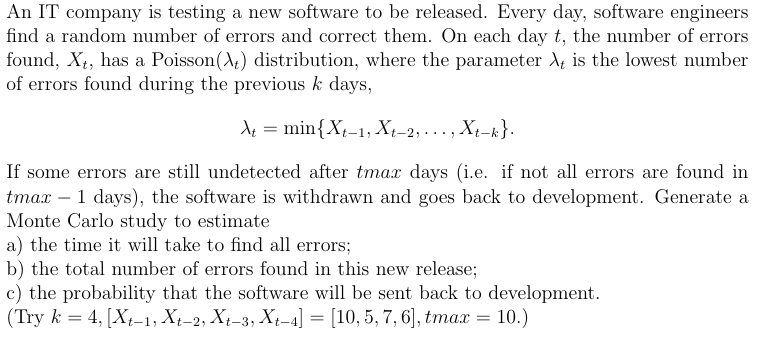

### a), b)

In [393]:
# Function generates a Random Variable with Poisson distribution using a special method, given lambda l = l' * t
def generate_poisson_rv(l):
    n = 0
    prod = np.random.rand()
    while prod >= np.e ** -l:
        n = n + 1
        prod = prod * np.random.rand()
        if prod < np.e ** -l:
            break
    return n

In [497]:
def simulation(k, tmax, initial_errors):
    ''' 
    1 - back to dev
    0 - not back to dev
    '''
    t = k
    errors = initial_errors.copy()
    errors_count = np.sum(errors)
    while True:
        t = t + 1
        if t == tmax and errors[-1] != 0:
            return 1, t, errors_count
            
        lambda_t = np.min(errors)
        X = generate_poisson_rv(lambda_t)
        errors_count += X
        
        errors[0:k-1] = errors[1:k]
        errors[-1] = X
    
        if X == 0:
            return 0, t, errors_count 

In [494]:
k = 4
t = 4
tmax = 10
errors = [10, 5, 7, 6]

print("initial values")
print(f"k = {k}, tmax = {tmax}")
print(errors)
print()

back_to_dev, t, errors_count = simulation(k, tmax, errors)

print(f"found {errors_count} errors this release")
if not back_to_dev:
    print(f"time to find all errors: t = {t}")
else:
    print("back to dev")

initial values
k = 4, tmax = 10
[10, 5, 7, 6]

found 52 errors this release
back to dev


### c) Complicated to interpret these probabilities => MC simulations

In [501]:
k = 4
t = 4
tmax = 10
errors = [10, 5, 7, 6]
        
N = 10000 # number of simulations
back_to_dev = 0

for _ in range(N):
    result = simulation(k, tmax, errors)
    back_to_dev += result[0]

probability = float(back_to_dev / n_trials)
print(f"Probability of going back to development: {probability:.4f}")

Probability of going back to development: 0.6844
